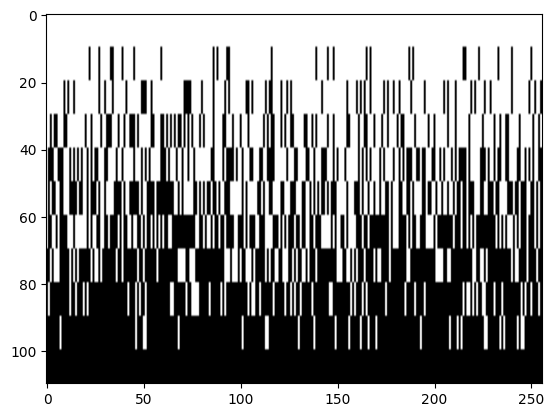

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# random
visible_harmony = np.zeros((110,256))

L = 256

total_stages = 10
stage_indices = np.arange(10)
for b in range(10):
    stage = stage_indices[b]

    percent_visible = stage / total_stages
    percent_predict = 1 / total_stages
    perm = np.random.permutation(L)
    num_visible = int(L * percent_visible)
    num_predict = int(L * percent_predict + 0.5)

    visible_idx = perm[:num_visible]
    predict_idx = perm[:num_visible + num_predict]  # predict includes visible + next unmasked tokens

    visible_harmony[(b*10):((b+1)*10), visible_idx] = 1

visible_harmony[-10:,:] = 1
plt.imshow(visible_harmony, cmap='gray_r', aspect='auto')

# return visible_harmony, denoising_target, stage_indices
# end random_progressive_masking

# def structured_progressive_masking(harmony_tokens, total_stages, mask_token_id, stage_in=None):
#     B, L = harmony_tokens.shape
#     device = harmony_tokens.device
#     visible_harmony = torch.full_like( harmony_tokens, mask_token_id )
#     denoising_target = harmony_tokens.clone()
#     input_unmask = torch.full_like( harmony_tokens, 0, dtype=torch.bool, device=device )
#     target_to_learn = torch.full_like(
#         harmony_tokens,
#         False,
#         dtype=torch.bool,
#         device=device
#     )
#     stage_indices = torch.randint(0, total_stages, (B,), device=device)
#     for i in range(B):
#         stage = stage_indices[i] if stage_in is None else stage_in

#         spacing_target = min( L, max(1, int((2**(8-stage)))) )
#         # Get the indices that will remain unmasked for this step
#         target_to_learn[i, ::spacing_target] = True  # reveal tokens at spacing in target
#         spacing_input = 2*spacing_target #max(2, int((2**(8*(1-stage/total_stages)))*(ts_num/ts_den)))
#         input_unmask[i, ::spacing_input] = spacing_input <= L  # reveal tokens at spacing in harmony input
#     visible_harmony[input_unmask] = harmony_tokens[input_unmask]
#     target_to_learn[input_unmask] = False
#     denoising_target[~torch.logical_or( target_to_learn , input_unmask )] = -100  # ignore tokens that were not shown to the model
#     return visible_harmony, denoising_target, stage_indices
# # end structured_progressive_masking